<a href="https://colab.research.google.com/github/johnjoel2001/ML_Explainability_II/blob/main/Explainable_Techniques_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XAI - AIPI 590**

**Assignment 04 - Explainable Techniques II**

**John Rohit Ernest Jayaraj**

In [55]:
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "ML_Explainability_II" # Change to your repo name
git_path = 'https://github.com/johnjoel2001/ML_Explainability_II.git' #Change to your path
!git clone "{git_path}"

Cloning into 'ML_Explainability_II'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [38]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-o9ndmr_9/alepython_b13b3dd3547a4f5a9521be5ccbae6782
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-o9ndmr_9/alepython_b13b3dd3547a4f5a9521be5ccbae6782
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.4 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=e70a4cdc594267069e028d96199c6f42b06f45d6eed453ea109b6d515fa0ab9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pb4hzwg9/wheels/ac/d2/e4/cd88ce55641d5422cdba165bd6f18c6fb6c0035385dc2bcce2
Successfully built alepython


In [54]:
# Importing Dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset (in-built)
from sklearn.datasets import fetch_california_housing

# Importing Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Importing ICE, PDP and ALE plots

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from alepython import ale_plot


In [4]:
# Loading the Dataset

data=fetch_california_housing()  # We are using an in-built dataset
df=pd.DataFrame(data.data,columns=data.feature_names)   # Making a dataframe
df['target']=data.target

In [5]:
df.head()  # Checking the first 5 rows of the dataset

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [56]:
df.columns # Checking the features

Index(['Longitude', 'Latitude', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'MedInc', 'Target'],
      dtype='object')

## **Features Info**

- **Longitude & Latitude**: Geographic coordinates of housing locations.
- **HouseAge**: Median age of houses in a given area.
- **AveRooms**: Average number of rooms per house.
- **AveBedrms**: Average number of bedrooms per house.
- **Population**: Total population in the given area.
- **AveOccup**: Average number of occupants per household.
- **MedInc**: Median income in the area.
- **Target**: House price (dependent variable).

**Corelation Analysis**

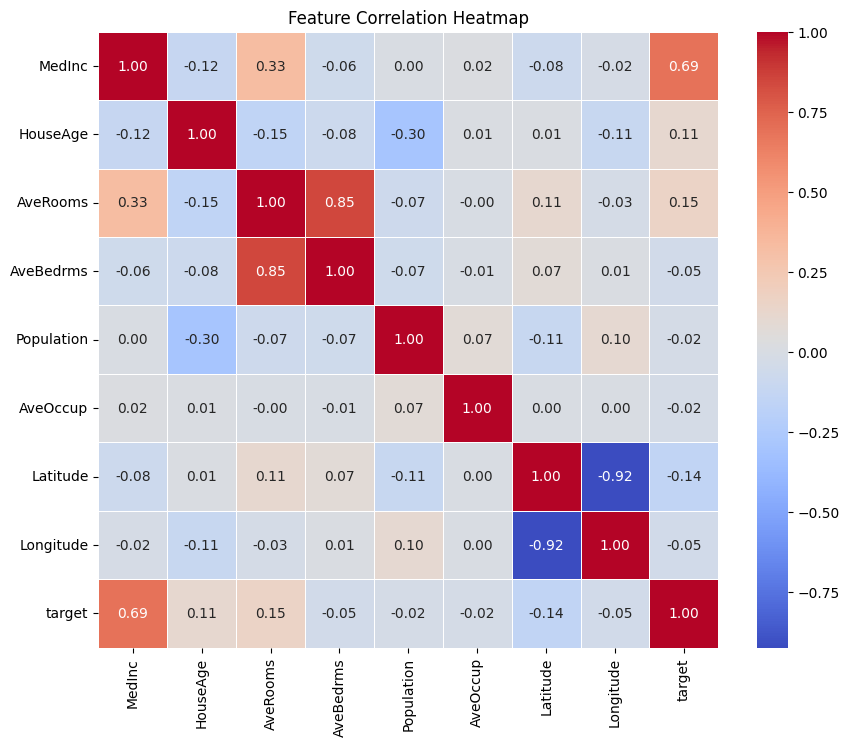

In [6]:
# Plotting the correlation plot
corr_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Inferences**

**Strong Positive Correlations**

1) `MedInc` (Median Income) & `Target` (House Price) - 0.69


*   This tells us that higher median income leads to higher house prices.

2) `AveRooms` (Average Number of Rooms) & `AveBedrms` (Avergae Number of Bedrooms) - 0.85

*   This tells us that houses with more rooms tend to have more bedrooms which is obvious.


**Strong Negative Correlations**

1) `Latitude` & `Longitude` - 0.92


*   Over here, we see that both latitude and longitude follow a structured pattern. There is a strong spatial relationship.

**Weak Correlations**

1) `Population` & `Target` : -0.02
*   Population size  has little direct effect on house prices.

2) `HouseAge` & `Target` - 0.11
* Old Houses don't necessarily mean the prices are high or low.








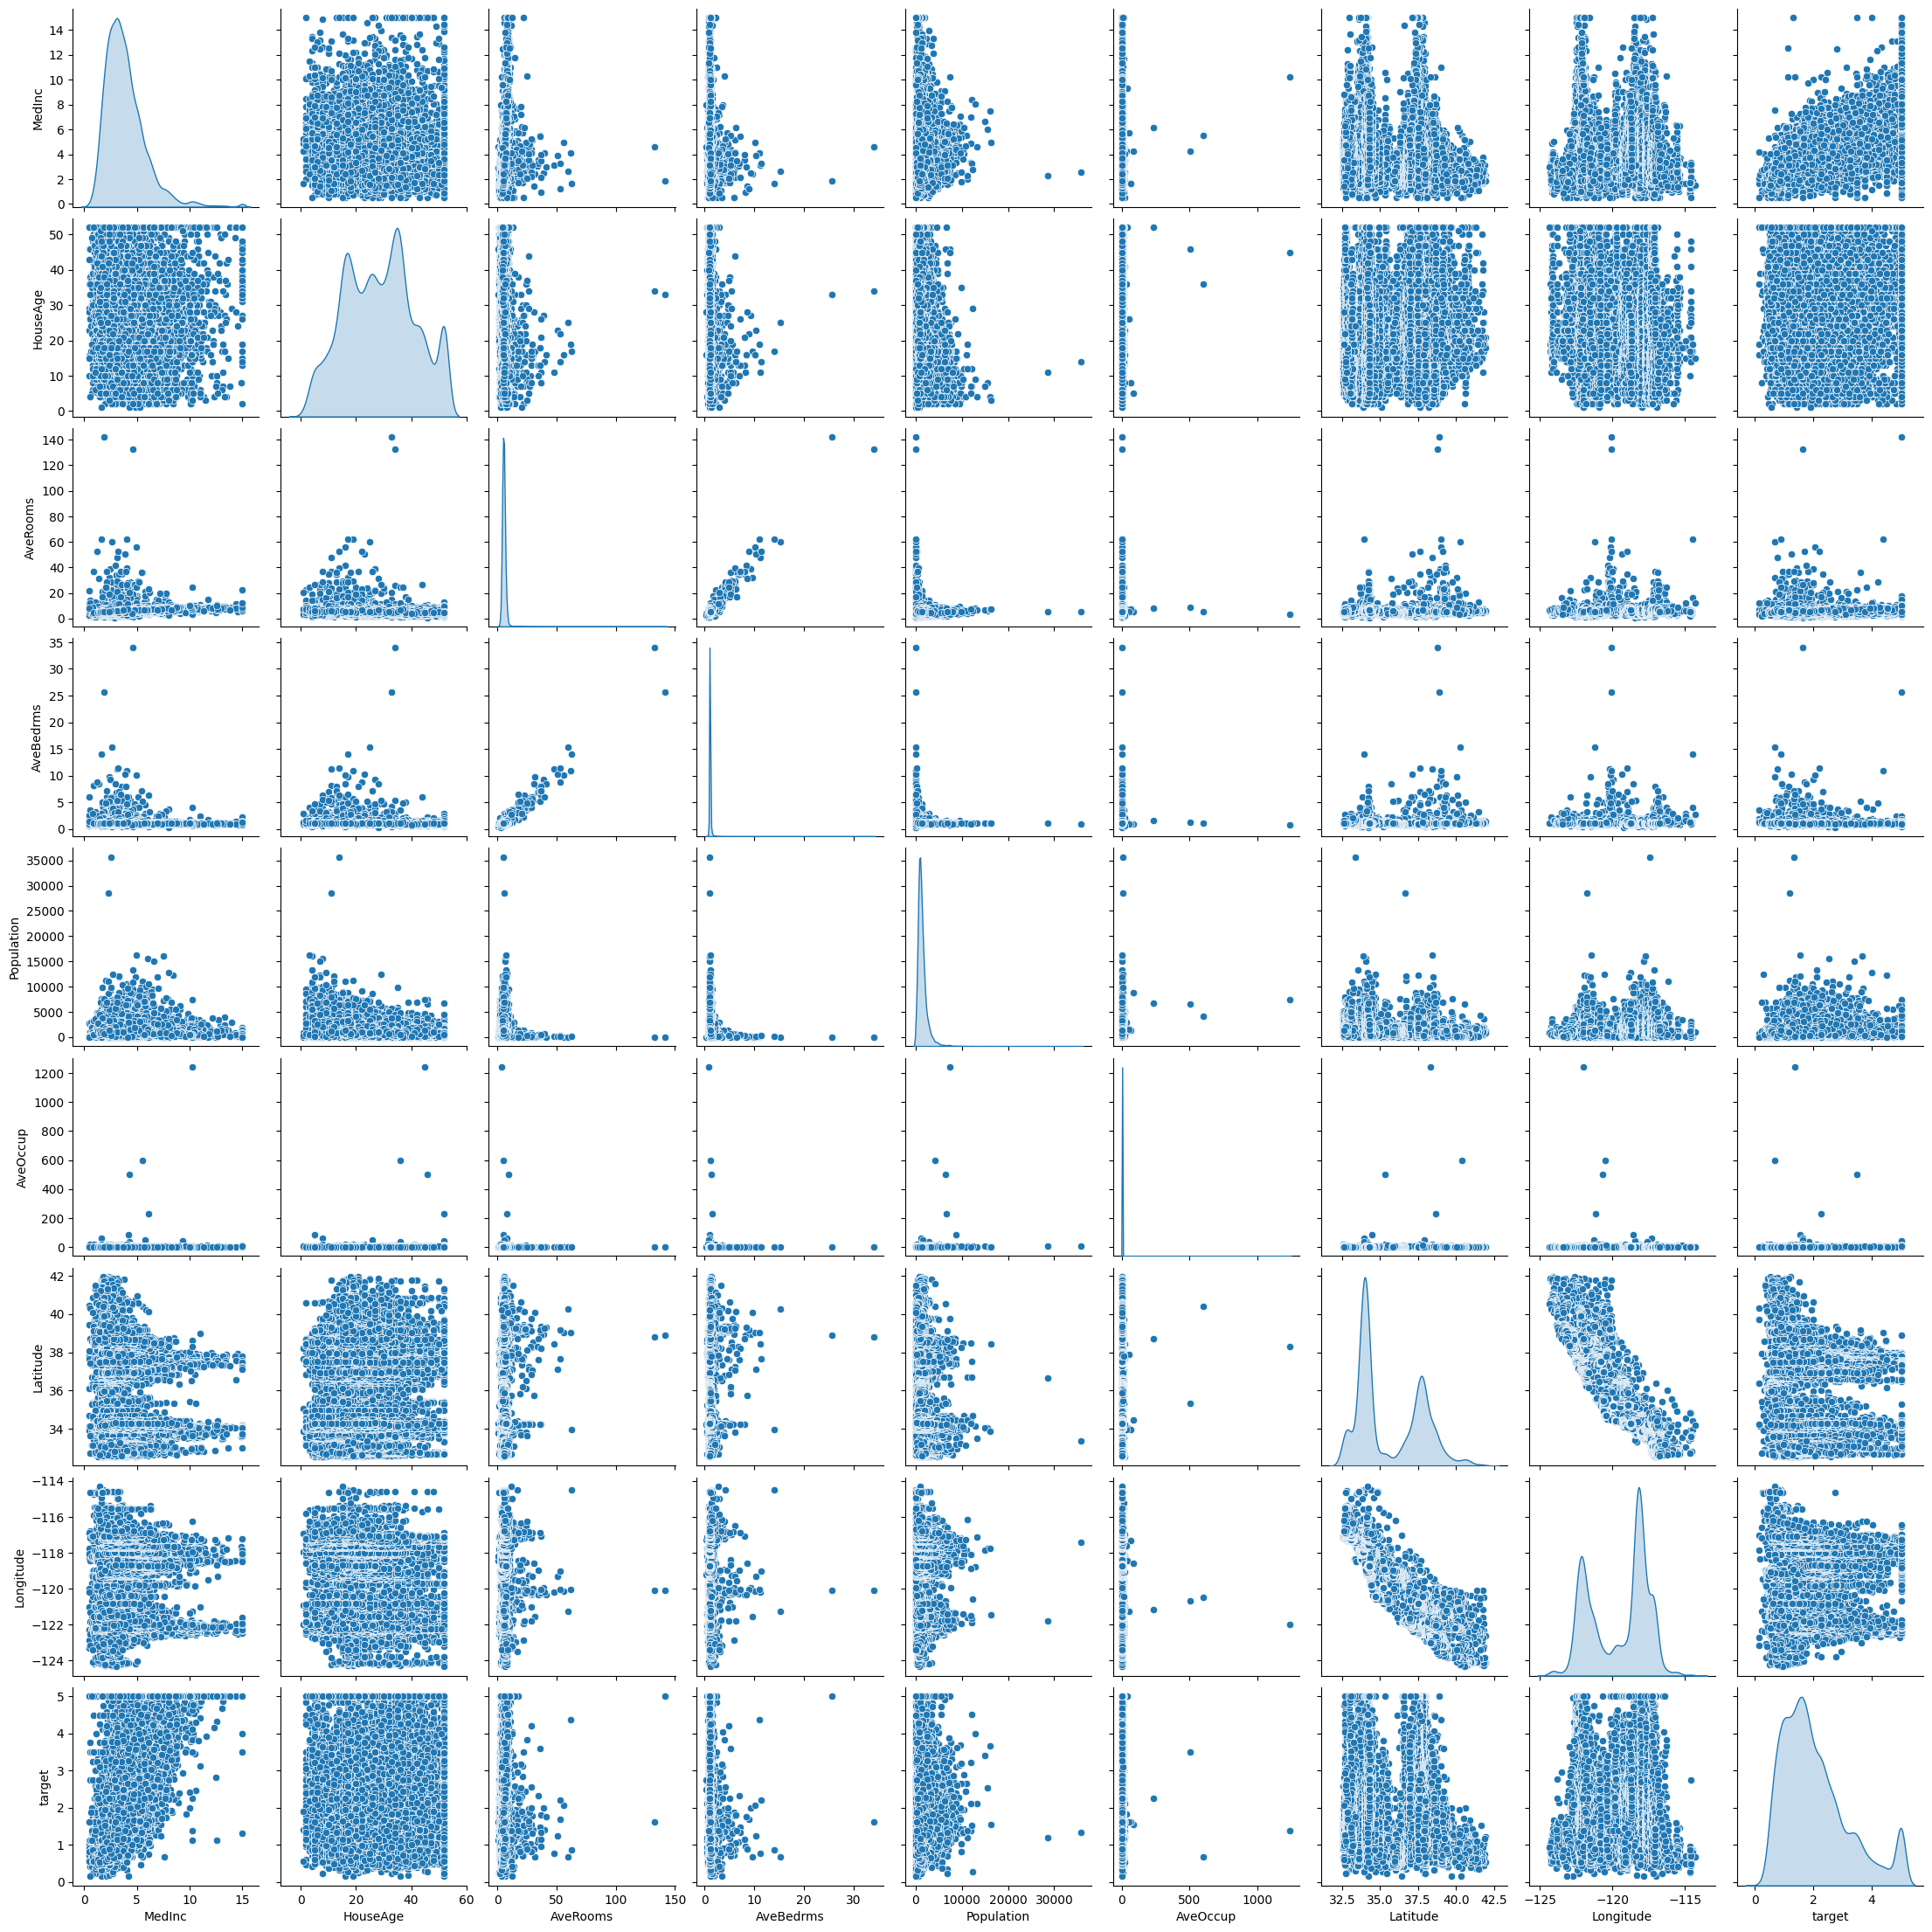

In [7]:
# pairplot visualization
selected_features = df.columns  # Selecting the features for visualization
sns.pairplot(df, vars=selected_features, diag_kind="kde")
plt.show()

# **Insights from the Pairplot**

**Nonlinear relationship:**

Some of the scatter plots in the pairplot are non-linear, especially the relationship between `MedInc` vs. `Target`.

**Skewed distribution:**

The features `Population`, `AveOccup` has highly skewed distribution with extreme outliers.

**Clustered relationships:**

Some variables, such as `Longitude` and `Latitude`, are clustered together which could indicate major cities.

# **Building the Model**

In [8]:
# Splitting the Data into Train and Test sets

X=df.drop('target',axis=1)
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train = pd.DataFrame(X_train, columns=X.columns).reset_index(drop=True) # Making a Dataframe

In [20]:
# Training a Random Forest Regressor Model

model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [45]:
features=['Longitude', 'Latitude', 'HouseAge', 'AveRooms', 'AveBedrms',
              'Population', 'AveOccup', 'MedInc']

# **Comparing ICE Plots, Partial Dependence Plot and ALE Plots for each Feature**

For each of the features below, I will plot the following plots in order and provide an interpretation.

1) ICE PLot

2) PDP Plot

3) ALE Plot

# **`'Longitude`'**

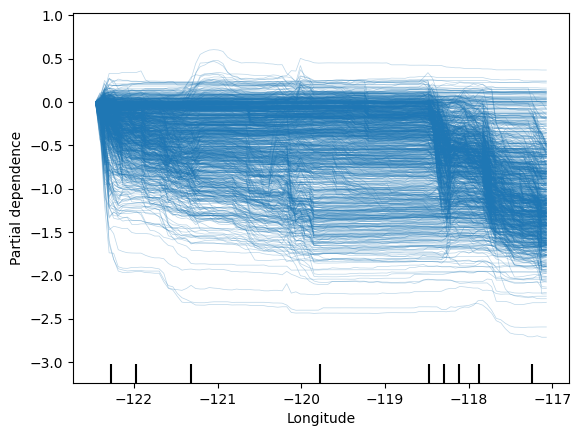

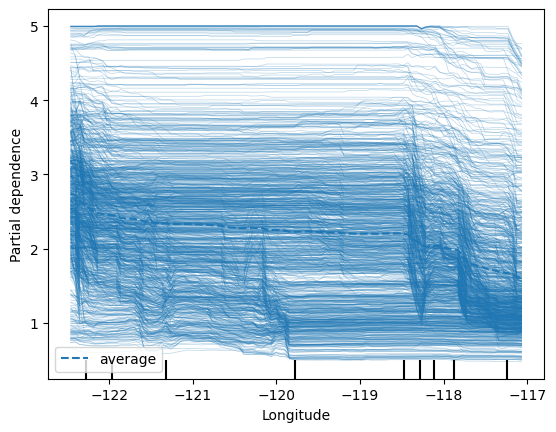

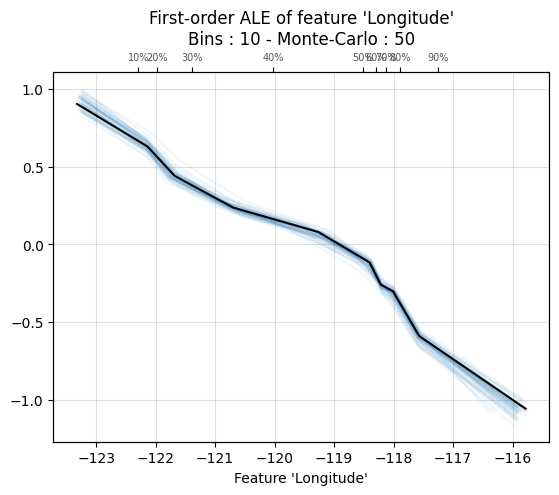

<Axes: title={'center': "First-order ALE of feature 'Longitude'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Longitude'">

In [41]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[0]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[0]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[0], monte_carlo=True)

**Inferences**


**ICE Plot - Focusing on Individual Effects**

*   We can witness high variance which says that data points react very differently to longitude changes.
*   We can also see that the lines are non-parallel, which suggests that it might have interactions with other features most probably `Latitude`
*   We can see sharp dips as well, which says that certain longitudes correspond to sudden price drops, possibly the boundaries of city ( maybe outskirts )







**PDP Plot - Focusing on Average Effect**



*   We can see a downward trend that on average, moving eastward (higher longitude) decreases prices.
*   Over here, the PDP does not capture interactions which is why ICE curves look much more chaotic than the PDP.
*   PDP is very smooth as compared to ICE.



**ALE Plot - Focuses on Correlated Features**

* We can see that the ALE plot confirms the price drop trend.
* Higher longitude = lower house prices.
* As the curve is smoother, it is much more stable than ICE.


**Conclusion**
* Areas of Lower Longitudes are associated with higher house prices, showing an inverse relationship between longitude and house price.

* ALE Plot is more reliable and interpretable than PDP and ICE plots.

# **`Latitude`**

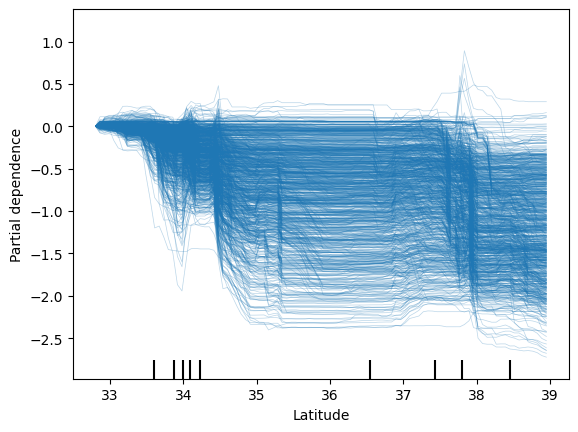

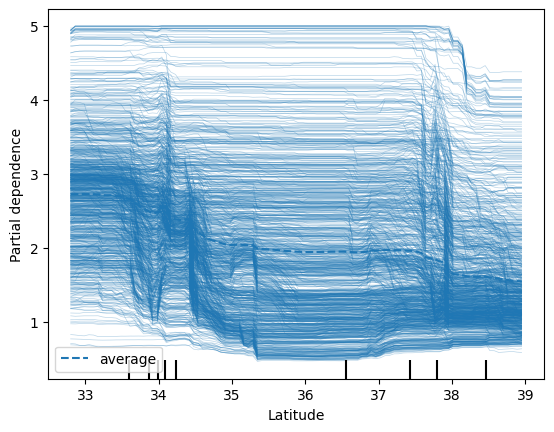

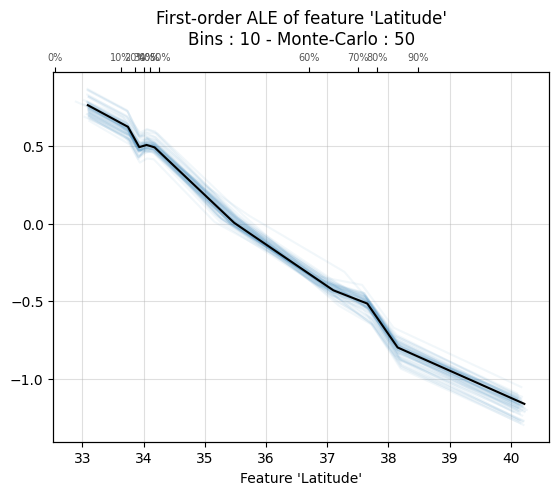

<Axes: title={'center': "First-order ALE of feature 'Latitude'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Latitude'">

In [43]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[1]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[1]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[1], monte_carlo=True)

# **Inferences**


**ICE Plot - Focusing on Individual Effects**

*   We can witness big varaition in each house prices reacts to latitude.
*   We can also see that in some areas there are sharp drops, maybe outskirts of city or high-cost zones.
*   We can also see that the lines are not parallel which might infer that latitude would interact with other features.


**PDP Plot - Focusing on Average Effect**

*   We can see taht the overall trend is inversely proportional i.e., higher latitude = lower house prices.
*   Over here, the PDP curve is smoother but ignores local variations.
*   If we take the average trend into consideration, it suggests lower latitude have higher prices.

**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms the price drop trend showing a negative effect on house prices.
* Higher latitude = lower house prices.
* As the curve is smoother, we can say that latitude has a steady impact, but still varies locally.

**Conclusion**

* Areas of Low Latitude are expensive, depicting an inverse relationship between latitude and house price.
* ALE shows the best depiction of the trend.

# **`HouseAge`**

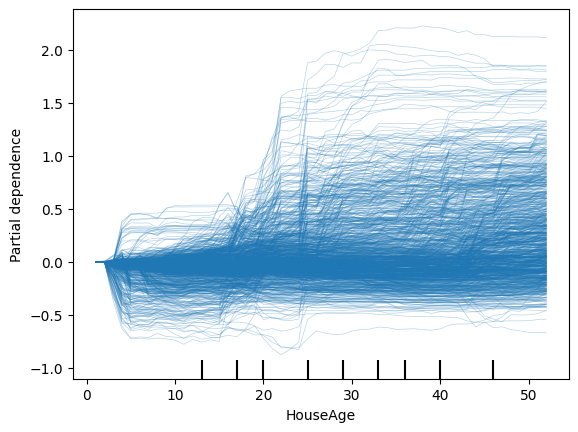

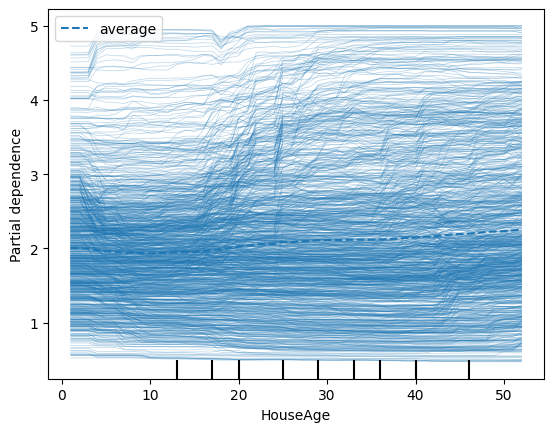

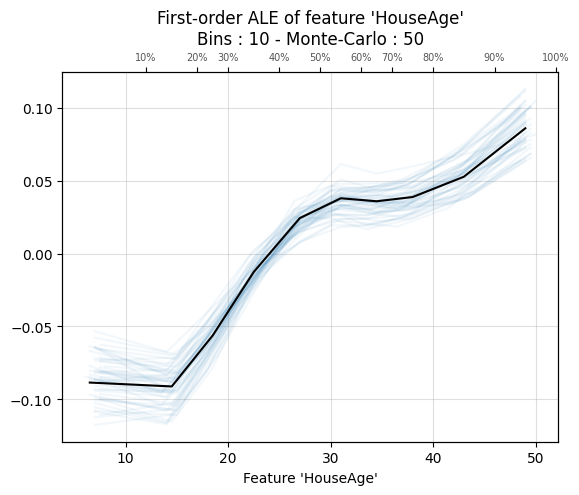

<Axes: title={'center': "First-order ALE of feature 'HouseAge'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'HouseAge'">

In [44]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[2]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[2]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[2], monte_carlo=True)

# **Inferences**

**ICE Plot - Focusing on Individual Effects**

*   We can witness high variability in price response, indicating taht house age alone does not determine price.
*   We can see that there is a share price increase around 20-30 years which as per my opinion ould be due to renovations
*   We can also witness non-parallel lines suggesting strong interaction with other features.


**PDP Plot - Focusing on Average Effect**

*   We can see that older houses ( 20 plus years ) have higher prices.
*   Over here, the PDP curve is smoother but ignores local variations.


**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms the house age positively impacts prices.
* As mentioned before, the strong price shift at 20-30 years suggest a stabilisation point.

**Conclusion**

* Older houses generally appreciate, but ICE does show wide variations due to interactions.
* ALE is the most reliable representation os the trend.


# **`AveRooms`**

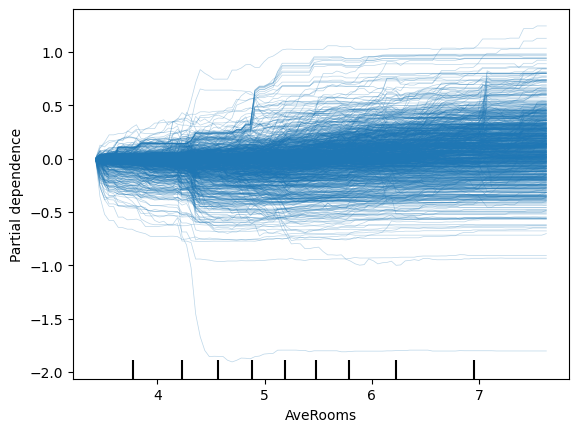

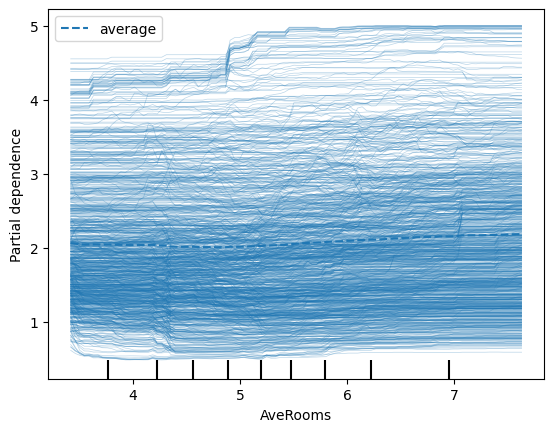

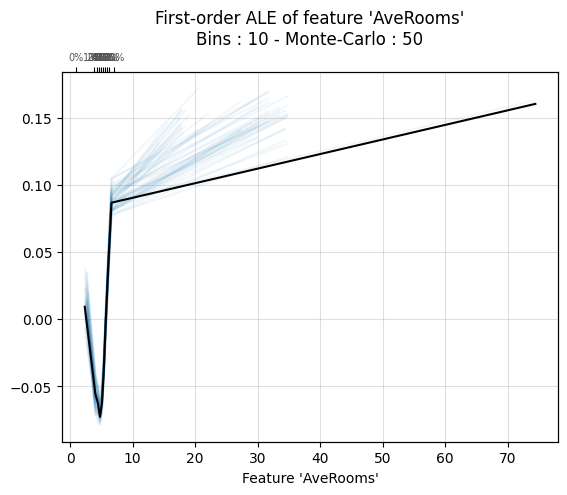

<Axes: title={'center': "First-order ALE of feature 'AveRooms'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'AveRooms'">

In [46]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[3]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[3]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[3], monte_carlo=True)

# **Inferences**

**ICE Plot - Focusing on Individual Effects**

*   We can witness high variability in price response, indicating the impact of average rooms on prices differs across houses.
*   We can see that there are some instances with sudden drop which suggests interactions with other features
*   We can also witness non-parallel lines suggesting that average number of rooms is not a strong predictor.


**PDP Plot - Focusing on Average Effect**

*   We can see a slight positive trens, indicating taht more rooms increase prices.
*   Over here, the PDP curve is smoother but ignores local variations.
*   I would say, that PDP plot in this case oversimplifies the relationship.


**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms a positive effect overall further confirming that more trends tend to increase house prices.
* From the ALE plot, it is evident that we can see a sharp initial dip, possible due to extreme values or bias.

**Conclusion**
* More rooms in general do increase price, but over here, it varies significantly across instances.
* ALE Plot provides the most reliable estimate.


# **`AveBedrms`**

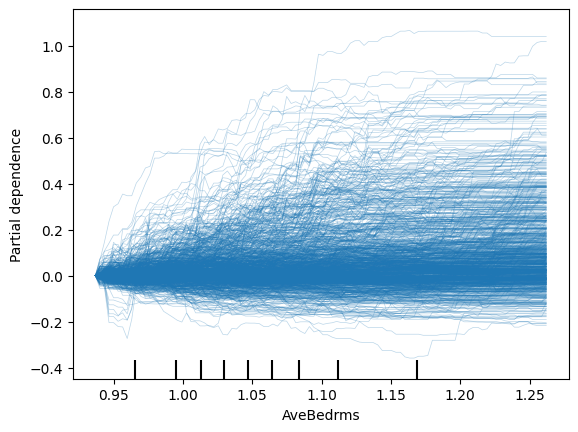

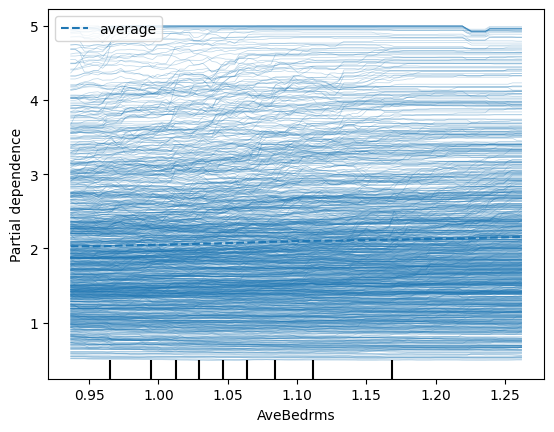

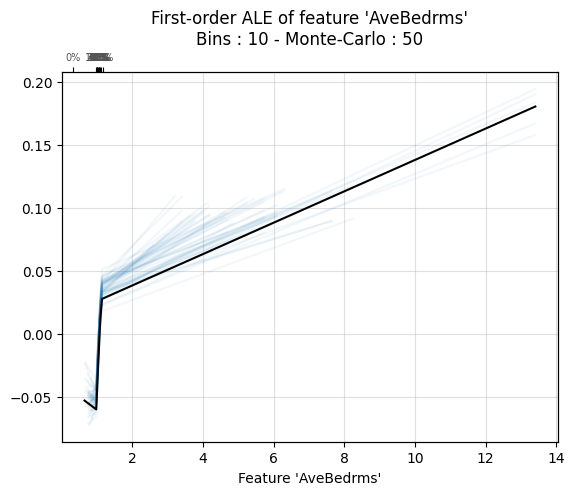

<Axes: title={'center': "First-order ALE of feature 'AveBedrms'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'AveBedrms'">

In [49]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[4]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[4]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[4], monte_carlo=True)

# **Inferences**

**ICE Plot - Focusing on Individual Effects**

*   We can witness high variability in price response, indicating the impact of average bedrooms on prices differs across houses.
*   We can see a slight upward trend, but some instances show drops,
*   We can also witness non-parallel lines suggesting that average number of bedrooms is not a strong predictor.


**PDP Plot - Focusing on Average Effect**

*   We can see a gradual price increase as AveBedrms rises, but I would say that the effect is weak.
*   Over here, the PDP curve is smoother but ignores individual variations seen in ICE.


**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms a positive impact, but the magnitude is small.
* There is a sharp dip initially, possibly due to outliers or maybe specific housing conditions.
* ALE Plot is more reliable than PDP, as it accounts for interactions.

**Conclusion**

* The impact of AveBedrms on price is positive but weak, with ICE showing strong interactions.
* ALE plot provides a clearer, more trustworthy trend.


# **`Population`**

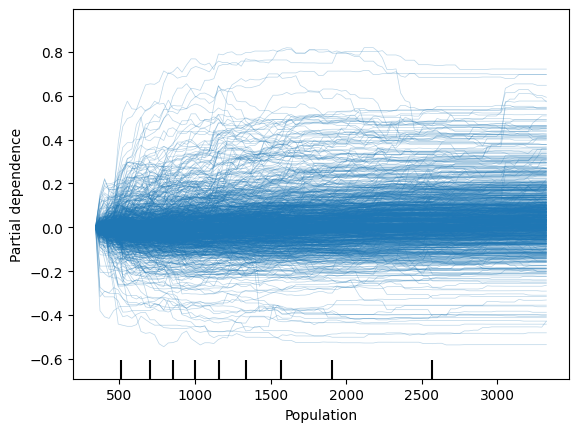

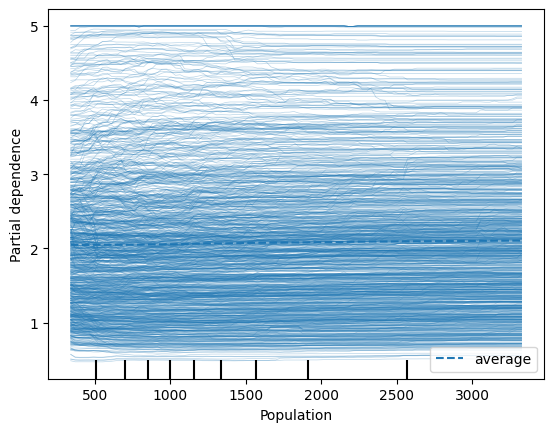

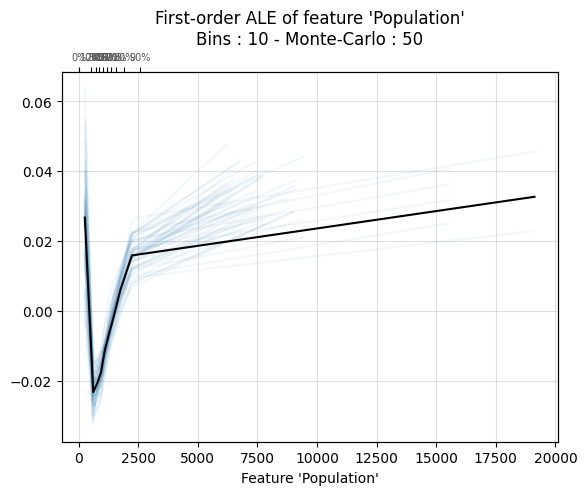

<Axes: title={'center': "First-order ALE of feature 'Population'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Population'">

In [50]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[5]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[5]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[5], monte_carlo=True)

# **Inferences**

**ICE Plot - Focusing on Individual Effects**

*   We can witness high variability, suggesting popualtion affects houses differently.
*   Since we could not see a clearer trend, we can infer that population alone does not strongly influence prices.


**PDP Plot - Focusing on Average Effect**

*   We can see a flat trend, confirming that popualtion has a minimal direct imapct on price.
*   There is nos trong correlation, meaning that popualtion likely interacts with other features.


**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms a slight positive trend, but I would say that the impact is weak compares to other features.
* There is a dip initially, possibly due to sparsely populated areas (maybe)
* ALE Plot indicates tht population has some effect on the Price.

**Conclusion**

* Popualtion has little direct impact on house prices.
* ALE plot provides a clearer, more trustworthy trend, confirming a weak positive impact.

# **`AveOccup`**

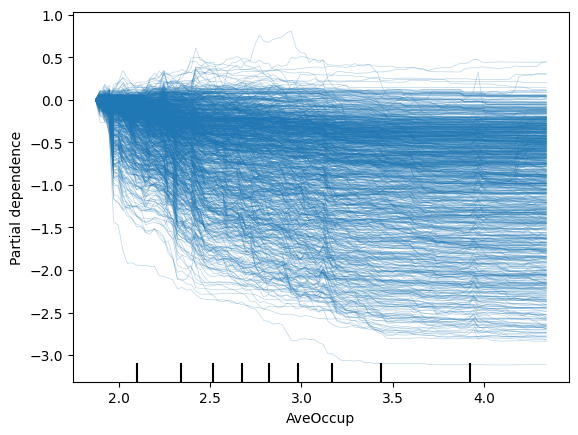

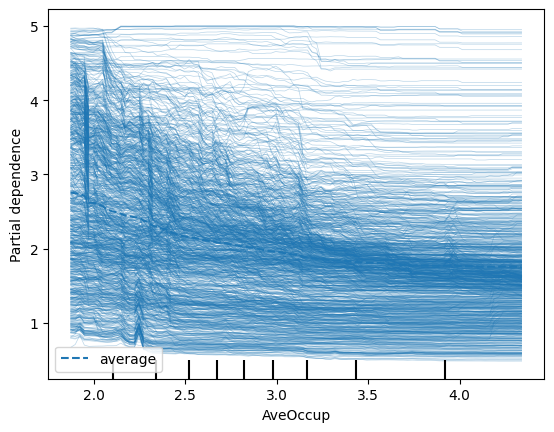

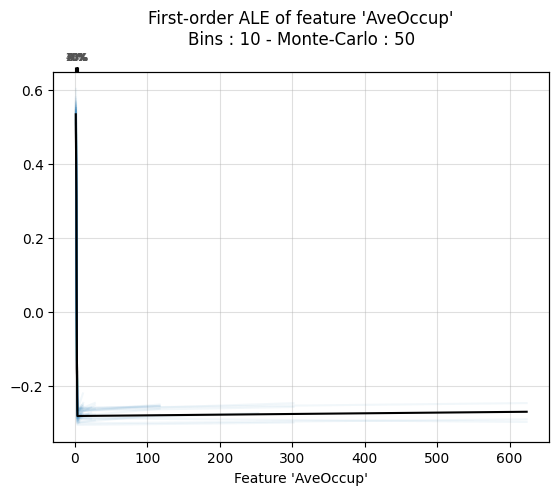

<Axes: title={'center': "First-order ALE of feature 'AveOccup'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'AveOccup'">

In [51]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[6]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[6]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[6], monte_carlo=True)

# **Inferences**

**ICE Plot - Focusing on Individual Effects**

*   We can witness a strong downward trend, suggesting that higher occupancy negatively impacts hous eprices.
*   There is a significant variability, indicating interactions with other features.
*   There is a sharp drop beyonf ~2.5 which might be probably due to overcrowding

**PDP Plot - Focusing on Average Effect**

*   We can see a consistently decreasing trend, confirming that higher occupancy leads to lower prices.
*   There is a strong negative correlation, making it an impactful feature.
*   PDP Plot smoothens the localised fluctuations which we saw in ICE.


**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms the negative trend.
* It is evident from the plot, we could see a flat trend beyond a certain threshold, suggesting occupancy diminishes after a point.


**Conclusion**

* Higher Occupancy negatively ffects house prices, likedy due to overcrowding.
* ALE, amongst the three, provides the clearest insight, confirming a sharp initial decline.

# **`MedInc`**

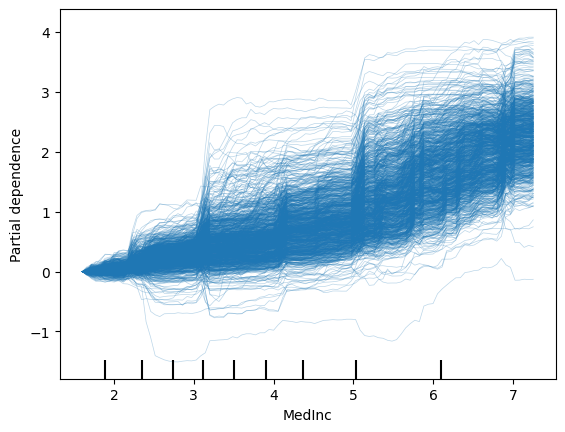

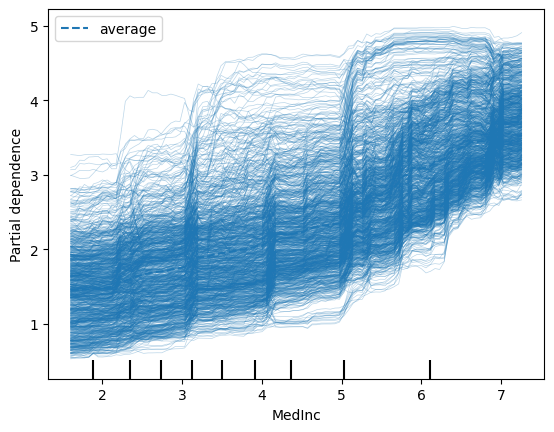

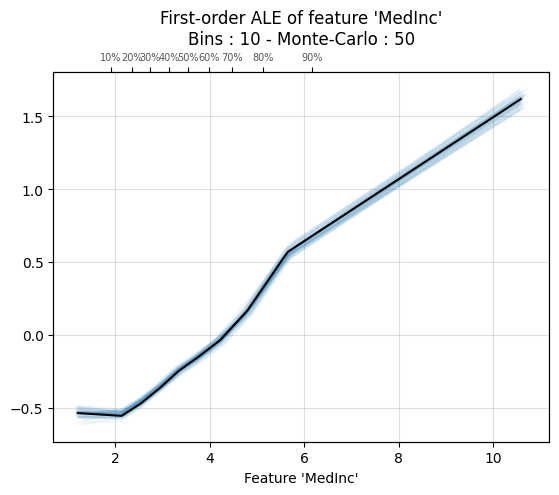

<Axes: title={'center': "First-order ALE of feature 'MedInc'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'MedInc'">

In [52]:
# ICE Plot
PartialDependenceDisplay.from_estimator(model, X_test, [features[7]], kind='individual', centered=True)

# PDP Plot
PartialDependenceDisplay.from_estimator(model, X_test, features=[features[7]], kind='both')

#ALE Plot
ale_plot(model, X_train, features[7], monte_carlo=True)

# **Inferences**

**ICE Plot - Focusing on Individual Effects**

*   We can witness a strong positive trend, suggesting that higher median income leads to higher house prices.
*   There is a high variability, indicating interactions with other features.
*   Non-parallel curves, shows income does not impact all houses equally.

**PDP Plot - Focusing on Average Effect**

*   We can see a consistently increasing trend, confirming that higher median income is a key driver of prices.
*   There is a steeper increase beyong income (~5), indicating a strong impact at higher income levels.
*   PDP Plot smoothens the localised fluctuations which we saw in ICE.


**ALE Plot - Focuses on Corrected Effects**

* We can see that the ALE plot confirms the positive relationship.
* It is evident that there is a linear increase, suggesting income consistently drives house prices.


**Conclusion**

* Median income has a strong and direct impact on house prices.
* ALE provides the most robust confirmation of this trend.

# **References**

1) https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/global_explanations.ipynb

2) https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html

3) https://christophm.github.io/interpretable-ml-book/ale.html

# **Note**

**AI Tools were not used in this Assignment**